# Python Assessment

## BEFORE STARTING: Rename this notebook - add your _FIRSTNAME_ to the end of the file

*---------------------------------------------------------------------------------------------------*

**Data set consists of two .csv files:**
- austin_bikeshare_stations.csv  
- austin_bikeshare_trips.csv

-------------

### Import Libraries
Run the cell below to import the necessary libraries for this project.  
  
You shouldn't need anything else, but if you really want others, feel free to import more.

In [339]:
import pandas as pd
import numpy as np
import re

# pprint is used to pretty-print dictionaries - you can use it if you want
from pprint import pprint

import matplotlib.pyplot as plt

-------------

### 1. Read & Display

**a.** Read in both .csv files into two separate pandas data frames. Use the data frame names given below.

In [340]:
df_trips = pd.read_csv('bike_share/austin_bikeshare_trips.csv')
df_stations = pd.read_csv('bike_share/austin_bikeshare_stations.csv')

**b.** Display the first few lines of data for each data frame  

In [341]:
df_trips.head(3)

,bikeid,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0


In [342]:
df_stations.head(3)

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed


**c.** How many rows and columns are in each data frame?  
- Simply print the values - no need to make a fancy sentence containing the variable... unless you want to.

df_trips: 11 cols x 649230 rows

df_stations: 6 cols x 72 rows

In [343]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649231 entries, 0 to 649230
Data columns (total 11 columns):
bikeid                648508 non-null float64
duration_minutes      649231 non-null int64
end_station_id        629389 non-null float64
end_station_name      649231 non-null object
month                 618479 non-null float64
start_station_id      630190 non-null float64
start_station_name    649231 non-null object
start_time            649231 non-null object
subscriber_type       647154 non-null object
trip_id               649231 non-null int64
year                  618479 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 54.5+ MB


In [344]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
latitude      72 non-null float64
location      72 non-null object
longitude     72 non-null float64
name          72 non-null object
station_id    72 non-null int64
status        72 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ KB


----------------

### 2. Remove NaN Values

**a.** In an effort to ignore data we don't want to process:  
- For both data frames:  
    - Drop all rows which contain **ANY** `NaN` values, in any column.  
    - DO NOT create new data frames, just drop the rows from the existing data frames.

In [345]:
df_stations.dropna(how='any') 

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved
5,30.26751,(30.26751 -97.74802),-97.74802,Republic Square,2500,moved
6,30.24891,(30.24891 -97.75019),-97.75019,South Congress & Elizabeth,2504,active
7,30.26461,(30.26461 -97.73049),-97.73049,Waller & 6th St.,2536,closed
8,30.26217,(30.26217 -97.72743),-97.72743,Plaza Saltillo,2542,active
9,30.28576,(30.28576 -97.74181),-97.74181,UT West Mall @ Guadalupe,2548,active


In [346]:
df_trips.dropna(how='any')

,bikeid,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0
5,861.0,29,2537.0,West & 6th St.,5.0,2540.0,17th & Guadalupe,2015-05-29 15:12:00,Local30,9900153369,2015.0
6,382.0,17,2575.0,Riverside @ S. Lamar,7.0,2567.0,Palmer Auditorium,2016-07-26 12:24:16,Walk Up,11114967,2016.0
7,435.0,49,2575.0,Riverside @ S. Lamar,1.0,2575.0,Riverside @ S. Lamar,2015-01-15 13:12:00,Walk Up,9900005413,2015.0
8,555.0,19,2571.0,Red River & 8th Street,5.0,2503.0,South Congress & James,2014-05-05 13:12:00,24-Hour Kiosk (Austin B-cycle),9900126917,2014.0
10,981.0,44,2565.0,Trinity & 6th Street,3.0,2563.0,Davis at Rainey Street,2014-03-14 20:12:00,24-Hour Kiosk (Austin B-cycle),9900051787,2014.0


**b.** How many rows were dropped from each data frame?

df_stations: none

df_trips: 649230-581625=67605

----------------

### 3. Averages

**a.** Using the data frame **`df_trips`**  
- Make a new list variable and put all the values in the column **`duration_minutes`** into this new list variable.  
- Print out the first 10 elements of this list

In [347]:
dur_min = list(df_trips['duration_minutes'])

**b.** For each value in this list:  
- IF the value falls between: 5 < x < 60 -- Put these values in a **new** list.

In [348]:
dur_min_560 = [x for x in dur_min if (x > 5 and x < 60)]

In [349]:
len(dur_min_560)

496013

**c.** How many values are in this new, filtered, list?  

496013

**d.** Calculate and print out the average of the values in this new list - **WITHOUT** - using any builtin functions. (i.e. don't use `mean()` or `sum()` )   
- ALSO print out the mean using the `mean()` function to verify your answer.

In [350]:
tot=0
for i in range(0,len(dur_min_560)):
    tot = tot + dur_min_560[i]
    
avg = tot / len(dur_min_560)
print(avg)
print(np.mean(dur_min_560))

19.1621933296
19.1621933296


**c.** Using the original list (NOT the list with the filtered values):  
- Multiply each value in this list by 2 - and save the results *back* to the original list. Do NOT save it to a new list.  
- Print out the first 3 values of this newly multiplied list  

In [351]:
dur_min = [x * 2 for x in dur_min]

In [352]:
print(dur_min[0:3])

[82, 12, 26]


----------------

### 4. Merge / Drop / Rename

**a.** Make a new data frame called **`df_trips_full`** by joining the two data frames: **`df_trips`** and **`df_stations`**  
- Merge using the columns: **`start_station_id`** and **`station_id`** respectively.  
- *NOTE:* Make sure all the rows from **`df_trips`** are kept in the new data frame.

In [353]:
df_trips_full = pd.merge(df_trips, df_stations, how='left', left_on='start_station_id', right_on='station_id')

**b.** Display the first 3 rows of this newly merged data frame.

In [354]:
df_trips_full.head(3)

,bikeid,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year,latitude,location,longitude,name,station_id,status
0,8.0,41,2565.0,Trinity & 6th Street,3.0,2536,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0,30.26461,(30.26461 -97.73049),-97.73049,Waller & 6th St.,2536.0,closed
1,141.0,6,2570.0,South Congress & Academy,10.0,2494,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0,30.26408,(30.26408 -97.74355),-97.74355,2nd & Congress,2494.0,active
2,578.0,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0,30.28039,(30.28039 -97.73809),-97.73809,Bullock Museum @ Congress & MLK,2538.0,active


**c.** From this newly merged data frame(**`df_trips_full`**), drop the columns **`name`** and **`station_id`**, since the information contained in these columns is already contained in other columns in the data frame.

In [355]:
df_trips_full = df_trips_full.drop(['name', 'station_id'], axis=1)

**d.** Because we joined **`df_stations`** to **`df_trips`** using the **`start_station_id`** column, we need to specify that the column called **`status`** which came from the **`df_stations`** is referring to the start_station and not the end_station.  
- Therefore: rename the column called **`status`** to **`start_station_id_status`**  
- *NOTE:* Don't make a new data frame. Alter the data frame already created.  

In [356]:
df_trips_full.rename(index=str, columns={"status": "start_station_id_status"})

,bikeid,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year,latitude,location,longitude,start_station_id_status
0,8.0,41,2565.0,Trinity & 6th Street,3.0,2536,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0,30.26461,(30.26461 -97.73049),-97.73049,closed
1,141.0,6,2570.0,South Congress & Academy,10.0,2494,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0,30.26408,(30.26408 -97.74355),-97.74355,active
2,578.0,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0,30.28039,(30.28039 -97.73809),-97.73809,active
3,555.0,80,2712.0,Toomey Rd @ South Lamar,11.0,2497,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0,30.27260,(30.2726 -97.74127),-97.74127,active
4,86.0,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0,30.25579,(30.25579 -97.73982),-97.73982,active
5,861.0,29,2537.0,West & 6th St.,5.0,2540,17th & Guadalupe,2015-05-29 15:12:00,Local30,9900153369,2015.0,30.27974,(30.27974 -97.74254),-97.74254,active
6,382.0,17,2575.0,Riverside @ S. Lamar,7.0,2567,Palmer Auditorium,2016-07-26 12:24:16,Walk Up,11114967,2016.0,30.25971,(30.25971 -97.75346),-97.75346,active
7,435.0,49,2575.0,Riverside @ S. Lamar,1.0,2575,Riverside @ S. Lamar,2015-01-15 13:12:00,Walk Up,9900005413,2015.0,30.26446,(30.26446 -97.75665),-97.75665,active
8,555.0,19,2571.0,Red River & 8th Street,5.0,2503,South Congress & James,2014-05-05 13:12:00,24-Hour Kiosk (Austin B-cycle),9900126917,2014.0,30.25103,(30.25103 -97.74926),-97.74926,active
9,668.0,20,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,NaN,2575,Riverside @ S. Lamar,2017-07-08 12:27:28,Walk Up,15339050,NaN,30.26446,(30.26446 -97.75665),-97.75665,active


**e.** Display the first 3 rows of the data frame **`df_trips_full`**

In [357]:
df_trips_full.head(3)

,bikeid,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year,latitude,location,longitude,status
0,8.0,41,2565.0,Trinity & 6th Street,3.0,2536,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0,30.26461,(30.26461 -97.73049),-97.73049,closed
1,141.0,6,2570.0,South Congress & Academy,10.0,2494,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0,30.26408,(30.26408 -97.74355),-97.74355,active
2,578.0,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0,30.28039,(30.28039 -97.73809),-97.73809,active


----------------

### 5. Uniqueness

**a.** How many unique values are there in the collumn called:  **`subscriber_type`** in the data frame **`df_trips_full`** ?

In [358]:
len(df_trips_full['subscriber_type'].unique())

53

----------------

### 6. Regex

*Do the following work with a regex if you can.*

**a.** From the column called **`start_time`** in the data frame **`df_trips_full`**:  
- Extract the **HOUR** from the starting time of day and put this into a new column called **`checkout_hour`**.  
    - The HOUR value that is put into the new column should be of type int() NOT a STRING  
    -ALSO:  
        - *NOTE* - the time is in the format: `Hours:Minutes:Seconds`

In [359]:
hrs = df_trips_full['start_time']

hr_list=[]
for i in range(len(df_trips_full['start_time'])) :
    m=re.search('-\d{2} (\d{2})',hrs[i])
    hr = pd.to_numeric(m.group(1))
    hr_list.append(hr)

df_trips_full['checkout_hour']=hr_list
    


**b.** Display the first few rows to make sure the new column contains the correct contents.

In [360]:
df_trips_full.head(3)

,bikeid,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year,latitude,location,longitude,status,checkout_hour
0,8.0,41,2565.0,Trinity & 6th Street,3.0,2536,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0,30.26461,(30.26461 -97.73049),-97.73049,closed,19
1,141.0,6,2570.0,South Congress & Academy,10.0,2494,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0,30.26408,(30.26408 -97.74355),-97.74355,active,2
2,578.0,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0,30.28039,(30.28039 -97.73809),-97.73809,active,16


#### ~ ~ ~ OPTIONAL ~ ~ ~ :
Come back to this OPTIONAL part once you have finished the entire assessment.  
**IF** you complete the assignment, **AND** you want some more stuff to do:   
- In the data frame **`df_trips_full`** - Convert the column called **`start_time`** to a datetime format, and then extract the **HOUR** into a new column called  **`checkout_hour_datetime`**.   
- Note this is doing the exact same thing as the Regex above, but using datetime functionality.  

In [408]:
df_trips_full['checkout_hour_datetime'] = DateTime.ParseExact(df_trips_full['start_time'], "yy/MM/dd h:mm:ss tt")

NameError: name 'DateTime' is not defined

----------------

### 7. Quartiles & Outliers

**a.** Using the data frame **`df_trips_full`**: Display the following values for the column: **`duration_minutes`** :
- Minimum  
- Maximum  
- 1st Quartile  
- 2nd Quartile  
- 3rd Quartile  
- Interquartile Range (IQR)  

In [361]:
max_durmin = df_trips_full['duration_minutes'].max()
min_durmin = df_trips_full['duration_minutes'].min()
q1_durmin = df_trips_full['duration_minutes'].quantile(.25)
q2_durmin = df_trips_full['duration_minutes'].quantile(.5)
q3_durmin = df_trips_full['duration_minutes'].quantile(.75)
iqr_durmin = q3_durmin - q1_durmin

print("Max:", max_durmin)
print("Min:", min_durmin)
print("Q1:", q1_durmin)
print("Q2:", q2_durmin)
print("Q3:", q3_durmin)
print("IQR:", iqr_durmin)


Max: 21296
Min: 0
Q1: 8.0
Q2: 15.0
Q3: 28.0
IQR: 20.0


**b.** Are there any outliers in the column: **`duration_minutes`**? If so, how many outliers are there in total (above and below)?

Nothing below, 147247 above

- Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR

In [362]:
dur_min_out = [x for x in dur_min if (x > (q3_durmin + 1.5*iqr_durmin) or x < q1_durmin - 1.5*iqr_durmin)]
len(dur_min_out)

147247

----------------

### 8. Dictionaries

**a.** Create a dictionary using the dataframe **`df_trips_full`**.  - Call this dictionary:  **`subscriber_type_dict`**  
- The **keys** of the dictionary should be the unique values in the column **`subscriber_type`**   
- The **value for each key** should be the number of times each uniuqe subscriber type in **`subscriber_type`** occurs in that column.   
    - **NOTE** DO NOT Worry about potential differences in capitalization. i.e. Annual vs annual.    
    - Also, Do not worry about separating the counts by year. i.e. there should only be one unique **key** for each subscriber type - not a different key for each year.  
    
The final dictionary can either have nested keys:  
- '7-Day': {'count': 2865}  
    - here the subscriber type '7-Day' is the key, which has a nested key called 'count' with the value 2865  
    
or each key can have only one value and no nested keys, like this:  
- '7-Day': 2865
    - here the subscriber type '7-Day' is the key, which takes the value: 2865  
    
Either way is fine.  

**b.** Display the resulting dictionary.

In [363]:
uniq_cnt = df_trips_full['subscriber_type'].value_counts()
subscriber_type_dict = uniq_cnt.to_dict()

print(subscriber_type_dict)

{'Walk Up': 282170, 'Local365': 126517, '24-Hour Kiosk (Austin B-cycle)': 108672, 'Local30': 37061, 'Annual Membership (Austin B-cycle)': 30306, 'Weekender': 24614, 'Explorer': 8246, 'Local365 ($80 plus tax)': 4005, 'Founding Member': 3550, '7-Day': 3137, 'Founding Member (Austin B-cycle)': 2764, '7-Day Membership (Austin B-cycle)': 2760, 'Local365+Guest Pass': 2567, 'Semester Membership (Austin B-cycle)': 2426, 'Semester Membership': 900, 'Local30 ($11 plus tax)': 840, 'Annual': 799, '24-Hour-Online (Austin B-cycle)': 737, 'Weekender ($15 plus tax)': 566, 'Try Before You Buy Special': 520, 'Annual (San Antonio B-cycle)': 402, 'RideScout Single Ride': 398, 'Annual Membership': 354, 'ACL Weekend Pass Special (Austin B-cycle)': 329, 'Annual Member': 326, 'Annual Member (Houston B-cycle)': 296, 'Annual Membership (Fort Worth Bike Sharing)': 266, 'Annual (Denver B-cycle)': 232, 'Explorer ($8 plus tax)': 186, 'Annual (Madison B-cycle)': 165, 'Annual (Broward B-cycle)': 142, 'Annual Plus': 1

**c.** How many times did the Founder of Denver's B-Cycle ride? i.e. *`Denver B-cycle Founder`*?

In [364]:
subscriber_type_dict['Denver B-cycle Founder']

10

#### ~ ~ ~ OPTIONAL ~ ~ ~ :
Come back to this OPTIONAL part once you have finished the entire assessment.  
**IF** you complete the assignment, **AND** you feel comfortable with this:   
- Generalize the dictionary creation process (in part **5a.**) to be a function which will create a dictionary of count occurrences for any column passed in to the function. But by default, process the **`subscriber_type`** column.

In [ ]:
def subcnt(x='subscriber_type'):
    uniq_cnt = df_trips_full[x].value_counts()
    subscriber_type_dict = uniq_cnt.to_dict()
    
    return subscriber_type_dict
    


----------------

### 9. Dictionary to data frame

**a.** Turn the dictionary you created of subscriber types and number of occurrences (part **5a.**) into a data frame called: **`df_subscriber_freq`**.  
- The names of the two columns of the final data frame should be: **`subscriber_type`** and **`number_of_occurrences`**  

In [365]:
df_subscriber_freq = pd.DataFrame(subscriber_type_dict, index=[0])
df_subscriber_freq = df_subscriber_freq.T

**b.** Display the first few rows of the data frame **`df_subscriber_freq`**

In [366]:
df_subscriber_freq.head(3)

,0
24-Hour Kiosk (Austin B-cycle),108672
24-Hour Membership (Austin B-cycle),1
24-Hour-Online (Austin B-cycle),737


**c.** Which subscriber type had the least number of rides?  How many rides did this subscriber type have?  

In [367]:
min(df_subscriber_freq[0])

1

**d.** Which subscriber type had the MOST number of rides?  How many rides did this subscriber type have?  

In [368]:
max(df_subscriber_freq[0])

282170

----------------

### 10. Plotting using Matplotlib

**a.** Using the dataframe **`df_trips_full`**  
- Make a histogram plot of the values in the column **`checkout_hour`** which was created in part **6a**.  
- Choose a smart number of bins. Think about this.  
- Label the axes

12.0 17.0 649231
0.11600348863310345 198.269899216


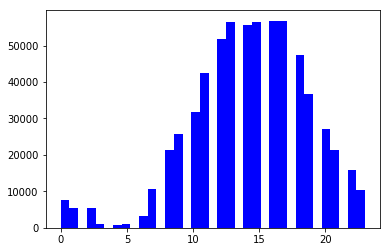

In [403]:
chkhr_q1 = df_trips_full['checkout_hour'].quantile(.25)
chkhr_q3 = df_trips_full['checkout_hour'].quantile(.75)
chkhr_max = df_trips_full['checkout_hour'].max()
chkhr_min = df_trips_full['checkout_hour'].min()

chkhr_cnt = len(df_trips_full['checkout_hour'])
print(chkhr_q1, chkhr_q3, chkhr_cnt)

h = 2 * (chkhr_q3 - chkhr_q1) * (chkhr_cnt ** (-0.333))

bincnt = (chkhr_max - chkhr_min) / h

print(h, bincnt)

_= plt.hist(df_trips_full['checkout_hour'], bins = 35, color = 'blue')
_= plt.xlabel = 'Checkout Hours'
_= plt.ylabel = 'Frequency'

plt.show()